# THE SPARKS FOUNDATION (GRIP) DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP
***

## TASK-1: Prediction using Supervised Machine Learning
***

- **Task:** Predict the percentage of a student based on the number of study hours.
- **Libraries used:** numpy, matplotlib, pandas, seaborn, scikit learn

Submitted by - **NAVYA SARA SHINE**


- **Dataset:** http://bit.ly/w-data

In [34]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Reading the data
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data read successfully")

Data read successfully


In [36]:
# Display the first 5 rows of the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [37]:
# Checking to see if there are any null values in the dataset.
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Since there are no null values in the given dataset, we can now proceed to visualize and manually find any relationship within the data.**

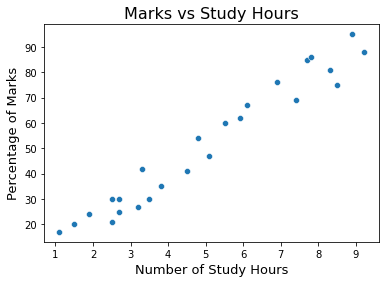

In [38]:
# Plotting the distribution of scores
sns.scatterplot(y=data['Scores'],x=data['Hours'])
plt.title('Marks vs Study Hours',size=16)
plt.ylabel('Percentage of Marks',size=13)
plt.xlabel('Number of Study Hours',size=13)
plt.show()

**From the above scatterplot, it is clear that there is a linear relation between the number of study hours used and the percentage of marks obtained.**

**However, let us also plot a regression line to confirm the correlation.**

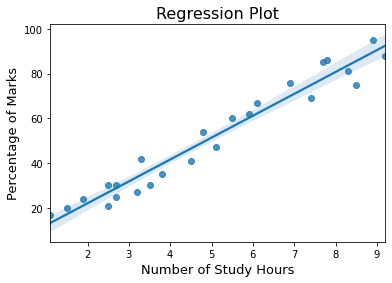

In [40]:
# Plotting the regression line
sns.regplot(x=data['Hours'],y=data['Scores'])
plt.title('Regression Plot',size=16)
plt.ylabel('Percentage of Marks',size=13)
plt.xlabel('Number of Study Hours',size=13)
plt.show()

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


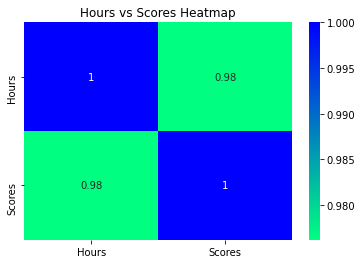

In [41]:
# Finding the correlation
print(data.corr())
sns.heatmap(data.corr(),annot=True,cmap='winter_r')
plt.title('Hours vs Scores Heatmap')
plt.show()


**Hence proving that the variables are positively correlated. (Correlation = 0.976)**

## Preparing the Data

The next step is to divide the data into 'attributes'(inputs) and 'labels' (outputs).

In [42]:
# x - attributes || y - labels
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

## Modelling Data

Now we are going to build a machine learning model to explore the underlying relationship between the study hours and the marks attained. To do that,we use the attributes and labels we have and split the dataset into two sets, 75% data for training our model and the rest 25% for testing the created model.

In [43]:
# Splitting the data (Training and Test datasets)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=0)

## Training the Model

We will be using the Linear Regression which is a Supervised Machine Learning Algorithm.

In [44]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

print('Training Complete')

Training Complete


## Making Predictions

In [45]:
# Predicting the scores

y_pred=lr.predict(x_test)

y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [46]:
# Comparing Actual vs Predicted

df=pd.DataFrame({'Hours':[i[0] for i in x_test],'Predicted Marks':[k for k in y_pred]})
df

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [47]:
#Comparing the Actual marks and the Predicted Marks
compare_scores=pd.DataFrame({'Actual Marks':y_test,'Predicted Marks':y_pred})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


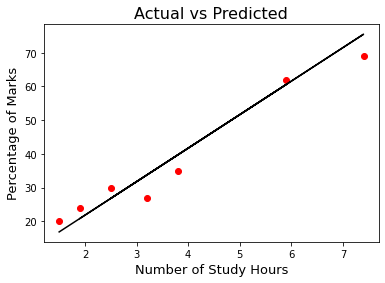

In [48]:
plt.scatter(x=x_test, y=y_test, color='red')
plt.plot(x_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=16)
plt.ylabel('Percentage of Marks', size=13)
plt.xlabel('Number of Study Hours', size=13)
plt.show()

## Evaluating the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [49]:
from sklearn import metrics as m

print('Mean Absolute Error:',m.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.130879918502486


Small value of Mean Absolute Error states that the chances of error or wrong forecasting through the model are very less.

**In this task, we are also asked to predict the score of a student if he/she studies for 9.25 hrs/day.**

In [50]:
hours=[9.25]
mark=lr.predict([hours])
print('Score = {}'.format(round(mark[0],2)))

Score = 93.89


Threfore, according to the regression model if a student studies for 9.25 hours a day he/she is likely to score **93.89** marks.
***